# Mental Fitness Tracker

In [9]:
#importing libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  Lasso

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
#reading data csv files

In [28]:
data1 = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')
data2 = pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')

In [29]:
#data information

In [30]:
data1.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                               1.70                                                
1                                               1.73                                                
2                                               1.79                                                
3                                               1.78                                                
4                                               1.71

In [31]:
data2.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.703023                             
1                                           0.702069                             
2                                           0.700792                             
3                                           0.700087                             
4                                           0.699898                             

   Eating disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.127700                            
1                                           0.123256                            
2                                           0.118844                            
3                                           0.115089                            
4                                           0.111815                            

   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.713314                             
1                                           4.702100                             
2                                           4.683743                             
3                                           4.673549                             
4                                           4.670810                             

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                               0.45                               
1                                               0.45                               
2                                               0.44                               
3                                               0.44                               
4                                               0.43                               

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                           4.981346                                
3                                           4.976958                                
4                                           4.977782                                

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                               0.44                                 
1                                               0.44                                 
2                                               0.45                                 
3                                               0.45                                 
4                                               0.45

In [32]:
#filling mean value to null values

In [33]:
numeric_columns = data1.select_dtypes(include=[np.number]).columns
data1[numeric_columns] = data1[numeric_columns].fillna(data1[numeric_columns].mean())

numeric_columns = data2.select_dtypes(include=[np.number]).columns
data2[numeric_columns] = data2[numeric_columns].fillna(data2[numeric_columns].mean())

In [34]:
data1.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                               1.70                                                
1                                               1.73                                                
2                                               1.79                                                
3                                               1.78                                                
4                                               1.71

In [35]:
data1.tail()

Entity Code  Year  \
6835  Zimbabwe  ZWE  2015   
6836  Zimbabwe  ZWE  2016   
6837  Zimbabwe  ZWE  2017   
6838  Zimbabwe  ZWE  2018   
6839  Zimbabwe  ZWE  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
6835                                               2.19                                                
6836                                               2.28                                                
6837                                               2.36                                                
6838                                               2.47                                                
6839                                               2.53

In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB


In [37]:
data1.describe()

Year  \
count  6840.000000   
mean   2004.500000   
std       8.656074   
min    1990.000000   
25%    1997.000000   
50%    2004.500000   
75%    2012.000000   
max    2019.000000   

       DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
count                                        6840.000000                                                
mean                                            4.818070                                                
std                                             2.294064                                                
min                                             0.220000                                                
25%                                             3.010000                                                
50%                                             4.680000                                                
75%                                             6.390000                                                
max                                            13.760000

In [38]:
data2.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.703023                             
1                                           0.702069                             
2                                           0.700792                             
3                                           0.700087                             
4                                           0.699898                             

   Eating disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.127700                            
1                                           0.123256                            
2                                           0.118844                            
3                                           0.115089                            
4                                           0.111815                            

   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.713314                             
1                                           4.702100                             
2                                           4.683743                             
3                                           4.673549                             
4                                           4.670810                             

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                               0.45                               
1                                               0.45                               
2                                               0.44                               
3                                               0.44                               
4                                               0.43                               

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                           4.981346                                
3                                           4.976958                                
4                                           4.977782                                

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                               0.44                                 
1                                               0.44                                 
2                                               0.45                                 
3                                               0.45                                 
4                                               0.45

In [39]:
data2.tail()

Entity Code  Year  \
7105  Zimbabwe  ZWE  2015   
7106  Zimbabwe  ZWE  2016   
7107  Zimbabwe  ZWE  2017   
7108  Zimbabwe  ZWE  2018   
7109  Zimbabwe  ZWE  2019   

      Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
7105                                           0.201042                                   
7106                                           0.201319                                   
7107                                           0.201639                                   
7108                                           0.201976                                   
7109                                           0.202482                                   

      Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
7105                                           0.538596                             
7106                                           0.538593                             
7107                                           0.538589                             
7108                                           0.538585                             
7109                                           0.538580                             

      Eating disorders (share of population) - Sex: Both - Age: Age-standardized  \
7105                                           0.095652                            
7106                                           0.096662                            
7107                                           0.097330                            
7108                                           0.097909                            
7109                                           0.098295                            

      Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
7105                                           3.184012                             
7106                                           3.187148                             
7107                                           3.188418                             
7108                                           3.172111                             
7109                                           3.137017                             

      Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
7105                                               0.60                               
7106                                               0.60                               
7107                                               0.61                               
7108                                               0.61                               
7109                                               0.61                               

      Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
7105                                           3.407624                                
7106                                           3.410755                                
7107                                           3.411965                                
7108                                           3.406929                                
7109                                           3.395476                                

      Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
7105                                               1.73                                 
7106                                               1.69                                 
7107                                               1.65                                 
7108                                               1.69                                 
7109                                               1.78

In [40]:
#data2.info()
data2.describe()

Year  \
count  7110.00000   
mean   2004.50000   
std       8.65605   
min    1990.00000   
25%    1997.00000   
50%    2004.50000   
75%    2012.00000   
max    2019.00000   

       Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                        7110.000000                                   
mean                                            0.266604                                   
std                                             0.037423                                   
min                                             0.188416                                   
25%                                             0.249005                                   
50%                                             0.270775                                   
75%                                             0.284874                                   
max                                             0.462045                                   

       Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                        7110.000000                             
mean                                            0.636968                             
std                                             0.221775                             
min                                             0.181667                             
25%                                             0.525175                             
50%                                             0.607311                             
75%                                             0.817256                             
max                                             1.506730                             

       Eating disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                        7110.000000                            
mean                                            0.195664                            
std                                             0.131493                            
min                                             0.044780                            
25%                                             0.099623                            
50%                                             0.158217                            
75%                                             0.228461                            
max                                             1.031688                            

       Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                        7110.000000                             
mean                                            4.101840                             
std                                             0.998259                             
min                                             1.879996                             
25%                                             3.497762                             
50%                                             3.999299                             
75%                                             4.438968                             
max                                             8.624634                             

       Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
count                                        7110.000000                               
mean                                            0.746728                               
std                                             0.454132                               
min                                             0.230000                               
25%                                             0.430000                               
50%                                             0.670000                               
75%                                             0.870000      

In [41]:
data1.shape

(6840, 4)

In [42]:
data2.shape

(7110, 10)

In [43]:
#merged_df = pd.merge(data1, data2, on=['Entity', 'Code', 'Year'])
merged_df= pd.merge(data2,data1)
merged_df.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.703023                             
1                                           0.702069                             
2                                           0.700792                             
3                                           0.700087                             
4                                           0.699898                             

   Eating disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.127700                            
1                                           0.123256                            
2                                           0.118844                            
3                                           0.115089                            
4                                           0.111815                            

   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.713314                             
1                                           4.702100                             
2                                           4.683743                             
3                                           4.673549                             
4                                           4.670810                             

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                               0.45                               
1                                               0.45                               
2                                               0.44                               
3                                               0.44                               
4                                               0.43                               

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                           4.981346                                
3                                           4.976958                                
4                                           4.977782                                

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                               0.44                                  
1                                               0.44                                  
2                                               0.45                                  
3                                               0.45                                  
4                                               0.45                                  

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                               1.70                                                
1                                               1.73                                      

In [44]:
#data1.isnull().sum()
#data2.isnull().sum()
merged_df.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized                    0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized                          0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized                           0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized                          0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized                       0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [45]:
merged_df.drop('Code', axis=1, inplace=True)

In [46]:
merged_df.set_axis(['Country','Year','Schizophrenia','Bipolar_disorder','Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'],axis='columns',inplace=True)

In [47]:
merged_df.head()

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.223206          0.703023         0.127700   
1  Afghanistan  1991       0.222454          0.702069         0.123256   
2  Afghanistan  1992       0.221751          0.700792         0.118844   
3  Afghanistan  1993       0.220987          0.700087         0.115089   
4  Afghanistan  1994       0.220183          0.699898         0.111815   

    Anxiety  drug_usage  depression  alcohol  mental_fitness  
0  4.713314        0.45    4.996118     0.44            1.70  
1  4.702100        0.45    4.989290     0.44            1.73  
2  4.683743        0.44    4.981346     0.45            1.79  
3  4.673549        0.44    4.976958     0.45            1.78  
4  4.670810        0.43    4.977782     0.45            1.71

# Exploratory Data Analysis

In [48]:
#heatmap 

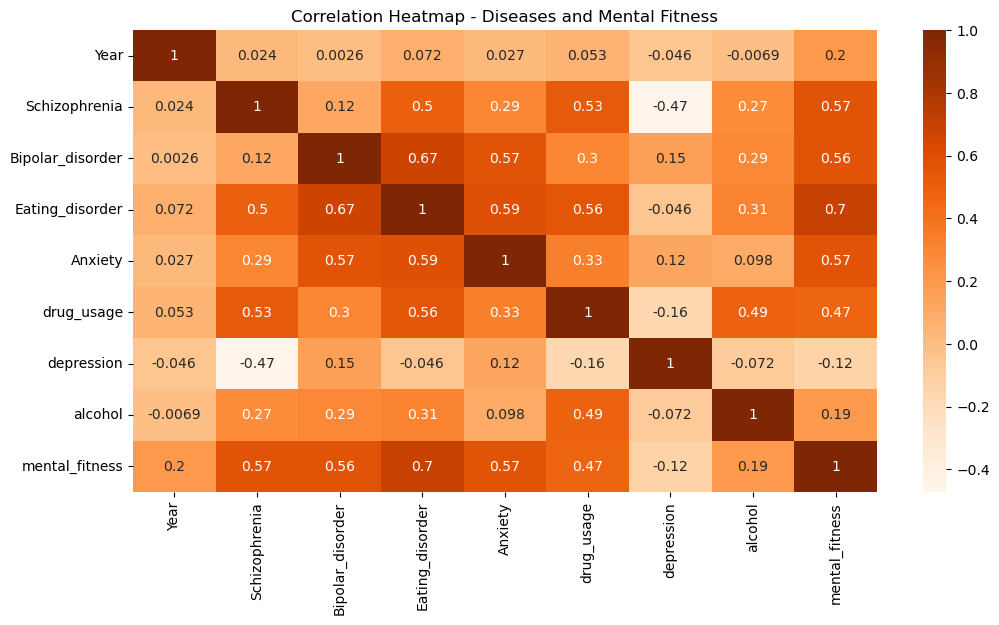

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(merged_df.corr(),annot=True,cmap='Oranges')
plt.title('Correlation Heatmap - Diseases and Mental Fitness')
plt.show()

In [50]:
#pairplot

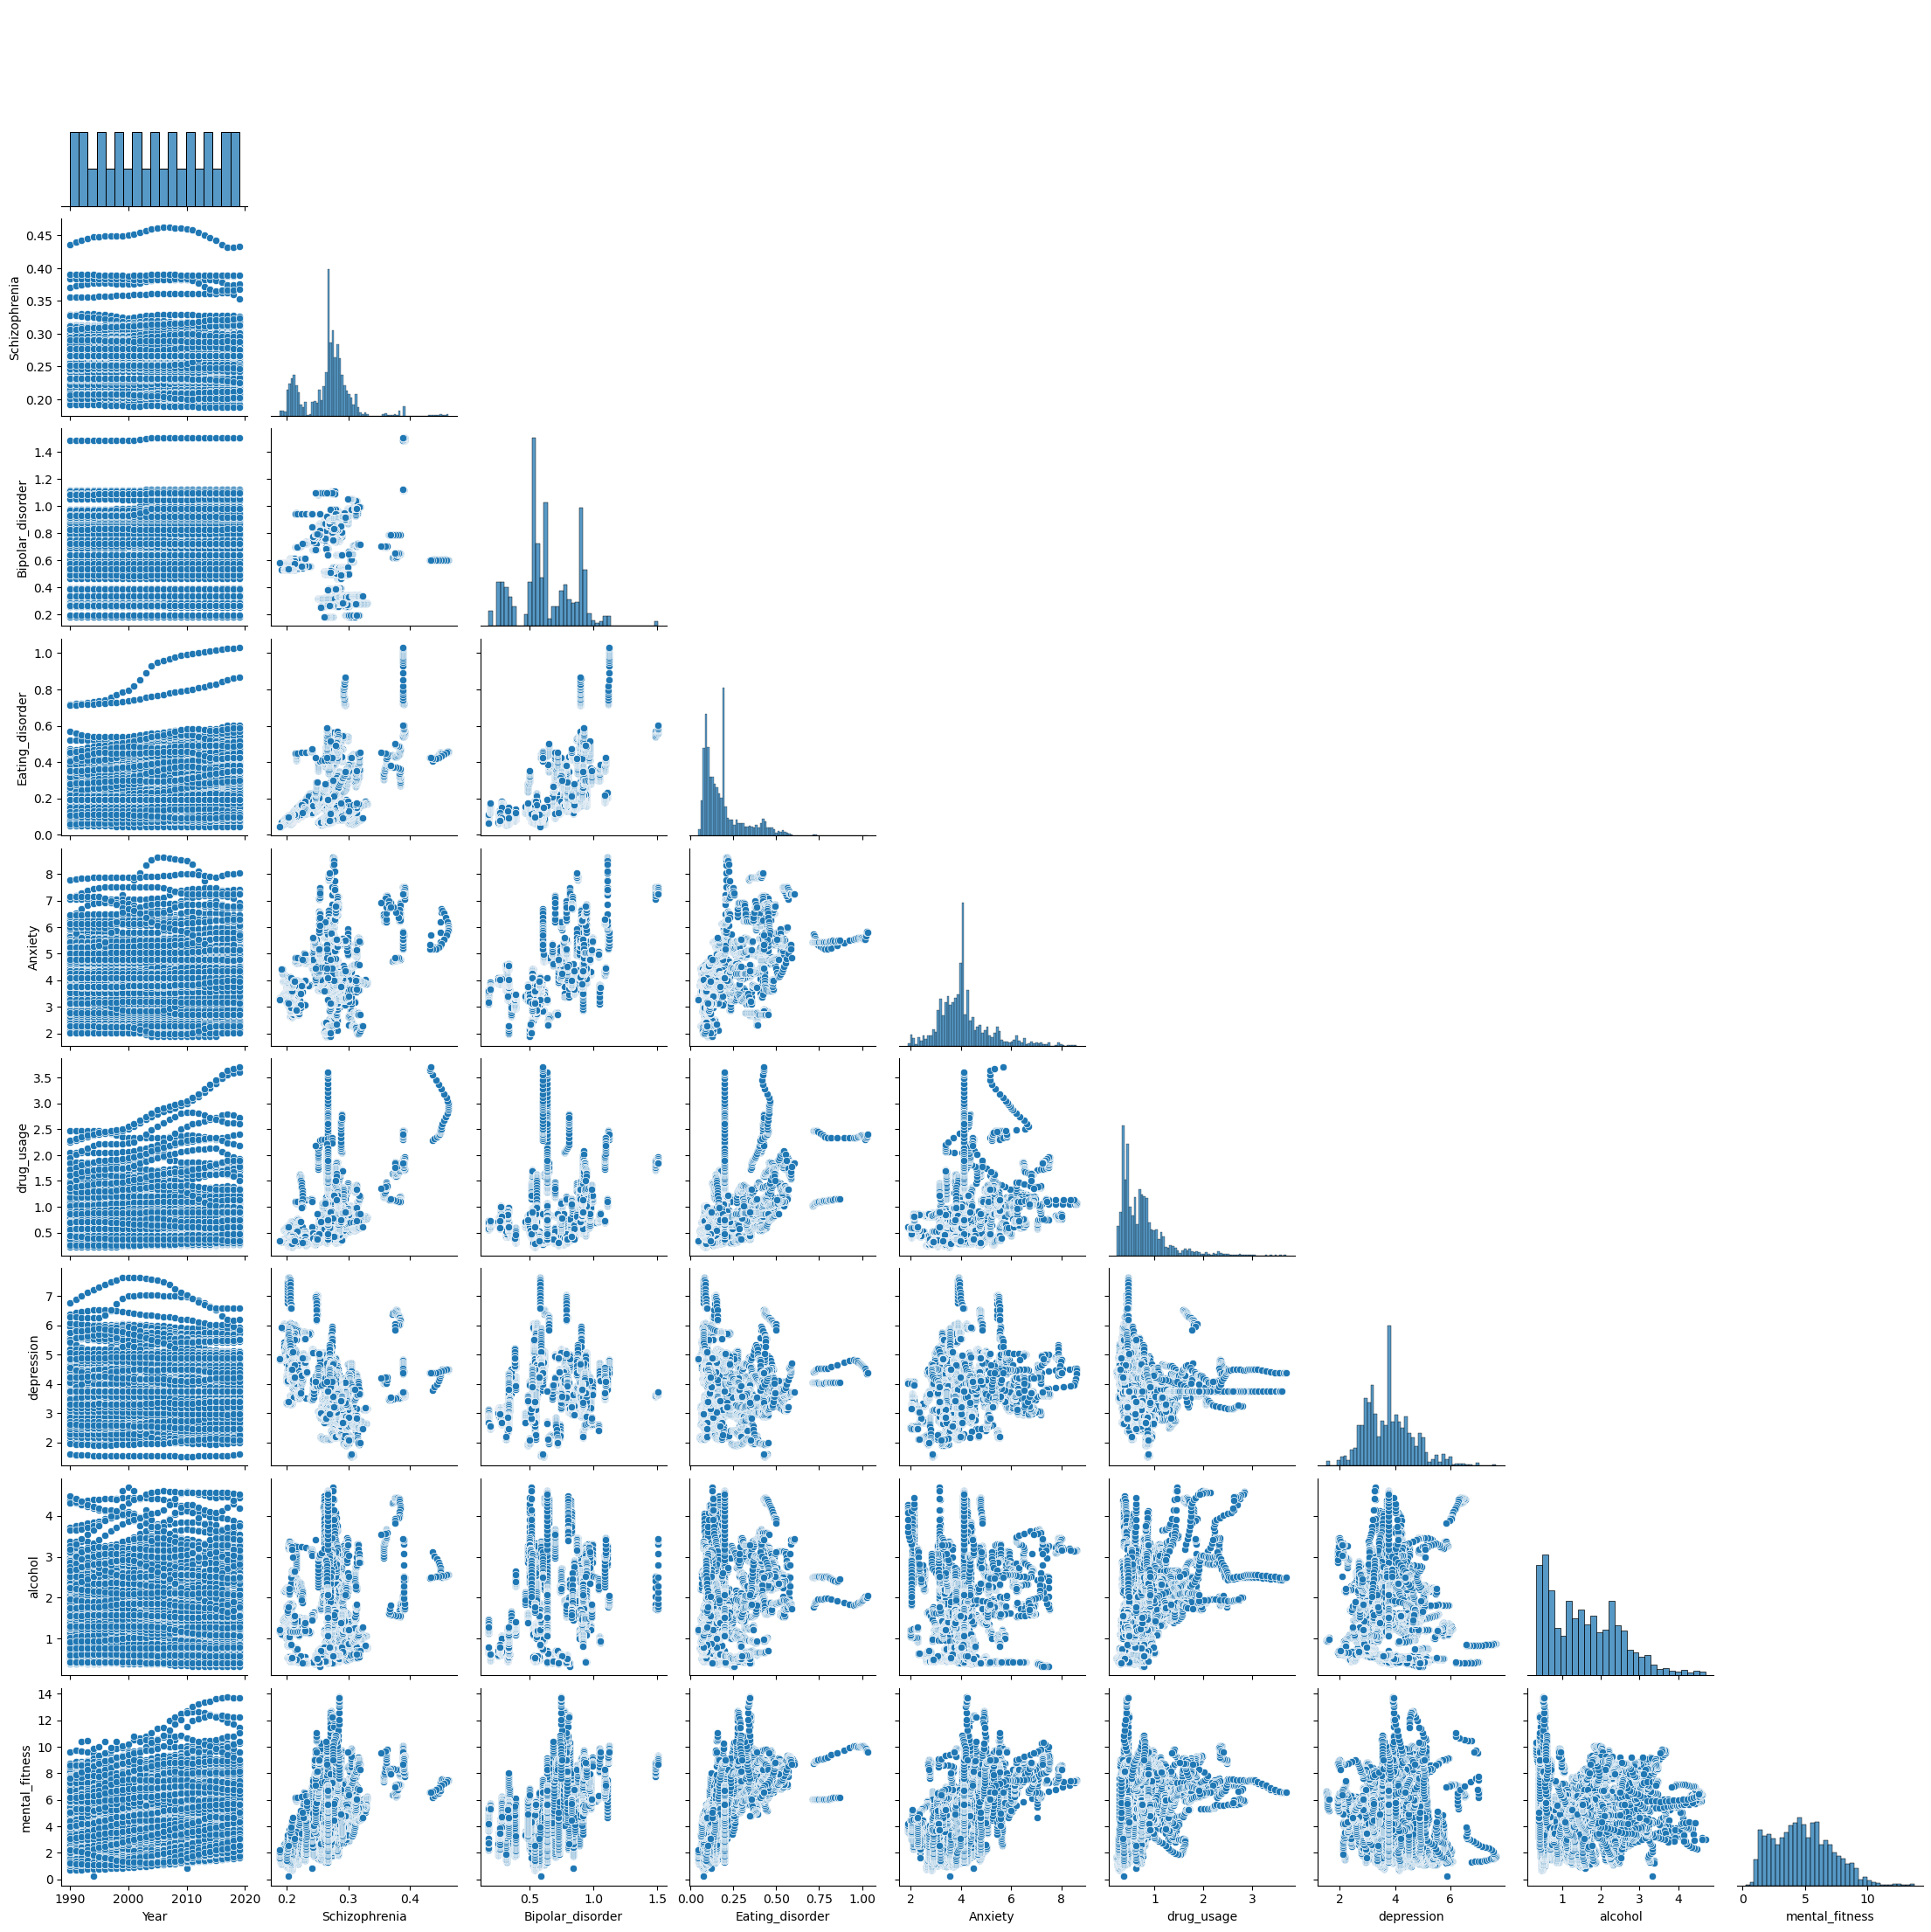

In [54]:
sns.pairplot(merged_df,corner=True)
plt.show()

In [57]:
#sns.jointplot(merged_df,x="Schizophrenia",y="mental_fitness",kind="reg",color="m")
#plt.show()

In [59]:
mean = merged_df['mental_fitness'].mean()
print(mean)

4.818070175438599


In [60]:
#piechart

In [61]:
import plotly.express as px
fig = px.pie(merged_df,values='mental_fitness',names='Year')
fig.show()

In [62]:
#lineplot

In [63]:
fig = px.line(merged_df,x="Year",y="mental_fitness",color='Country',markers=True,color_discrete_sequence=['red','blue'],template = 'plotly_dark')
fig.show()

In [69]:
fig=px.bar(merged_df.head(10),x='Year',y='mental_fitness',color='Year',template='ggplot2')
fig.show()

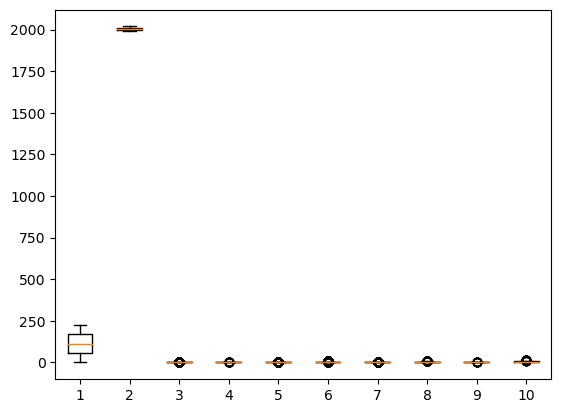

In [70]:
#data = ["mental_fitness","Year"]
plt.boxplot(merged_df)
plt.show()

In [67]:
df = merged_df
df.shape

(6840, 10)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   drug_usage        6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 845.9+ KB


In [72]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in merged_df.columns:
    if merged_df[i].dtype == 'object':
        merged_df[i]=l.fit_transform(merged_df[i])

In [73]:
#data read into X and y

In [74]:
X = df.drop('mental_fitness',axis=1)
y = df['mental_fitness']

In [75]:
#traing and testing data set

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [79]:
print('shapes of training and testing datasets\n')
print('X_train : ',x_train.shape)
print('y_train : ',y_train.shape)
print('X_test : ',x_test.shape)
print('y_train : ',y_test.shape)

shapes of training and testing datasets

X_train :  (4788, 9)
y_train :  (4788,)
X_test :  (2052, 9)
y_train :  (2052,)


# Linear Regression

In [87]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_predict = lr.predict(X_train) #Predicting the y based on training
mse = mean_squared_error(y_train,y_predict) #difference blw observed value and predicted value
rmse = np.sqrt(mse) #differenct blw predicted and actual values
r2 = r2_score(y_train,y_predict)

print("Linear Regression Model Performance : (Training) \n")
print("MSE : {}".format(mse))
print("RMSE : {}".format(rmse))
print("r2 : {}".format(r2))

Linear Regression Model Performance : (Training) 

MSE : 1.8740231363002007
RMSE : 1.3689496471018212
r2 : 0.6534965515777861


In [89]:
y_predict = lr.predict(X_test) #Predicting the y based on training
mse = mean_squared_error(y_test,y_predict) #difference blw observed value and predicted value
rmse = np.sqrt(mse) #differenct blw predicted and actual values
r2 = r2_score(y_test,y_predict)

print("Linear Regression Model Performance : (Testing) \n")
print("MSE : {}".format(mse))
print("RMSE : {}".format(rmse))
print("r2 : {}".format(r2))

Linear Regression Model Performance : (Testing) 

MSE : 1.6104249418410599
RMSE : 1.2690251935407193
r2 : 0.6726478931459918


#Lasso

In [82]:
ls = Lasso(alpha=0.5)
ls.fit(X_train, y_train)
y_predict2 = ls.predict(X_train) #Predicting the y based on training

mse = mean_squared_error(y_train,y_predict2) #difference blw observed value and predicted value
rmse = np.sqrt(mse) #differenct blw predicted and actual values
r2 = r2_score(y_train,y_predict2)

print("  Lasso Regression Model Performance : \n")
print("MSE : {}".format(mse))
print("RMSE : {}".format(rmse))
print("r2 : {}".format(r2))

  Lasso Regression Model Performance : 

MSE : 3.7352739929196526
RMSE : 1.9326856942916644
r2 : 0.3093546742951525


# Randomforest Regression

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

y_predict = rf.predict(X_train)#Predicting the y based on training
mse = mean_squared_error(y_train,y_predict) #difference blw observed value and predicted value
rmse = np.sqrt(mse) #differenct blw predicted and actual values
r2 = r2_score(y_train,y_predict)
print(" Random Forest Regression Model Performance : (Training) \n")
print("MSE : {}".format(mse))
print("RMSE : {}".format(rmse))
print("r2 : {}".format(r2))

 Random Forest Regression Model Performance : (Training) 

MSE : 0.005350222761069334
RMSE : 0.07314521693910911
r2 : 0.9990107536024355


In [93]:

ytest_predict = rf.predict(X_test)#Predicting the y based on training
mse = mean_squared_error(y_test,ytest_predict) #difference blw observed value and predicted value
rmse = np.sqrt(mse) #differenct blw predicted and actual values
r2 = r2_score(y_test,ytest_predict)
print(" Random Forest Regression Model Performance : (Testing)\n")
print("MSE : {}".format(mse))
print("RMSE : {}".format(rmse))
print("r2 : {}".format(r2))

 Random Forest Regression Model Performance : (Testing)

MSE : 0.050264377548732996
RMSE : 0.22419718452454526
r2 : 0.9897827278609629


# Conclusion


The most precise model is: Random Forest Regression

The least precise model is: Lasso Regression